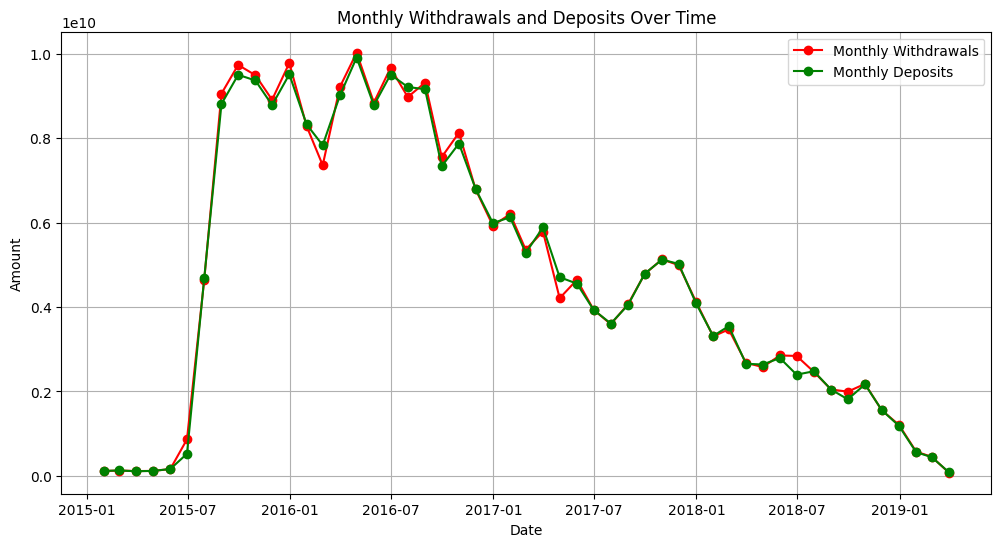

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file (replace 'bank.xlsx' with the path to your file)
file_path = 'd:/bank.xlsx'
bank_data = pd.read_excel(file_path)

# Clean data
bank_data_cleaned = bank_data.drop(columns=['CHQ.NO.', '.']).dropna(subset=['DATE', 'BALANCE AMT'])
bank_data_cleaned['DATE'] = pd.to_datetime(bank_data_cleaned['DATE'])
bank_data_cleaned.set_index('DATE', inplace=True)

# Resample monthly data for withdrawals and deposits
monthly_data = bank_data_cleaned.resample('ME').sum(numeric_only=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['WITHDRAWAL AMT'], label='Monthly Withdrawals', color='red', marker='o')
plt.plot(monthly_data.index, monthly_data['DEPOSIT AMT'], label='Monthly Deposits', color='green', marker='o')
plt.title("Monthly Withdrawals and Deposits Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()